In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import xarray as xr
import pylab as P
import math
import statistics

In [3]:
import numpy as np
import csv
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!ls ./gdrive/MyDrive/images_for_learning_20210713/

images_for_learning  images_for_learning_20210715


In [4]:
infiles = glob.glob('./gdrive/MyDrive/images_for_learning_20210713/images_for_learning_20210715/images_for_learning/*')
print(infiles)


['./gdrive/MyDrive/images_for_learning_20210713/images_for_learning_20210715/images_for_learning/parallel_run0002_1.nc', './gdrive/MyDrive/images_for_learning_20210713/images_for_learning_20210715/images_for_learning/parallel_run0004_1.nc', './gdrive/MyDrive/images_for_learning_20210713/images_for_learning_20210715/images_for_learning/parallel_run0003_1.nc', './gdrive/MyDrive/images_for_learning_20210713/images_for_learning_20210715/images_for_learning/parallel_run0001_1.nc', './gdrive/MyDrive/images_for_learning_20210713/images_for_learning_20210715/images_for_learning/parallel_run0000_1.nc', './gdrive/MyDrive/images_for_learning_20210713/images_for_learning_20210715/images_for_learning/parallel_run0006_1.nc', './gdrive/MyDrive/images_for_learning_20210713/images_for_learning_20210715/images_for_learning/parallel_run0005_1.nc', './gdrive/MyDrive/images_for_learning_20210713/images_for_learning_20210715/images_for_learning/parallel_run0009_1.nc', './gdrive/MyDrive/images_for_learning_2

In [5]:
#read in the data
ds = xr.open_mfdataset(infiles, concat_dim='n_samples',combine='nested', parallel=True)
print(ds)

#Separate the data array into ml input, ml output and metadata
output_ds = ds.mesh_90
output_array = output_ds.values

<xarray.Dataset>
Dimensions:      (dim_0: 1, n_samples: 10250, x: 32, y: 32)
Coordinates:
    longitude    (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    latitude     (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    longitude2   (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    latitude2    (n_samples, x, y) float64 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
Dimensions without coordinates: dim_0, n_samples, x, y
Data variables: (12/23)
    temp_sfc     (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    dewtemp_sfc  (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    w_sfc        (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    u_sfc        (n_samples, x, y) float32 dask.array<chunksize=(250, 32, 32), meta=np.ndarray>
    v_sfc        (n_samples, x, y) float32 dask.array<chunksize

In [ ]:
for n_samples in range(10250):
  mesh = ds.mesh.values.ravel()
plt.show()

In [ ]:
mesh

,Array,Chunk
Bytes,83.97 MB,2.05 MB
Shape,"(10250, 32, 32)","(250, 32, 32)"
Count,123 Tasks,41 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,83.97 MB,2.05 MB
Shape,"(10250, 32, 32)","(250, 32, 32)"
Count,123 Tasks,41 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


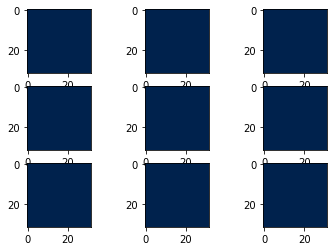

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(ds.mesh[i], cmap=plt.get_cmap('cividis'))

In [ ]:
#getting the 90th percentile mesh over all the patches
for N_sample in range(10250):
  mesh_90 = ds.mesh_90.values.ravel()
  plt.show()


In [ ]:
#Finding the appropriate bin size of the histogram
mesh.max()

3.0

In [ ]:
mesh.min()

0.0

In [ ]:
mesh

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
#loading in input array

meshfrac = ds.meshfrac.values
mesh = ds.mesh.values
time = ds.time.values
lon = ds.lon.values
lat = ds.lat.values
mesh90 = ds.mesh_90



input_ds = ds.drop(('mesh','mesh_90','meshfrac','time','lon','lat'))
variables = []
for variable in input_ds:
    variables.append(ds[variable])
    #print(variable)
input_array = np.stack(variables)

In [ ]:
print(meshfrac)
meshfrac.min()

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


0.0

In [ ]:
min = meshfrac.min()
max = meshfrac.max()

max - min

0.4794921875

In [ ]:
meshfrac

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
mesh.coordinates

'quantile latitude longitude'

(array([1.048494e+07, 2.454000e+03, 1.917000e+03, 1.304000e+03,
        9.630000e+02, 7.270000e+02, 5.740000e+02, 4.540000e+02,
        3.940000e+02, 2.910000e+02, 2.560000e+02, 1.810000e+02,
        1.990000e+02, 1.470000e+02, 1.280000e+02, 1.150000e+02,
        1.180000e+02, 9.400000e+01, 7.900000e+01, 6.300000e+01,
        5.800000e+01, 5.500000e+01, 6.000000e+01, 4.600000e+01,
        4.300000e+01, 2.300000e+01, 2.700000e+01, 2.200000e+01,
        2.100000e+01, 1.600000e+01, 2.100000e+01, 1.400000e+01,
        1.500000e+01, 1.200000e+01, 1.600000e+01, 1.600000e+01,
        1.200000e+01, 1.200000e+01, 7.000000e+00, 1.100000e+01,
        4.000000e+00, 1.500000e+01, 1.100000e+01, 3.000000e+00,
        8.000000e+00, 7.000000e+00, 1.000000e+00, 5.000000e+00,
        3.000000e+00, 3.000000e+00, 5.000000e+00, 4.000000e+00,
        1.000000e+00, 2.000000e+00, 3.000000e+00, 1.000000e+00,
        2.000000e+00, 2.000000e+00, 4.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 0.00

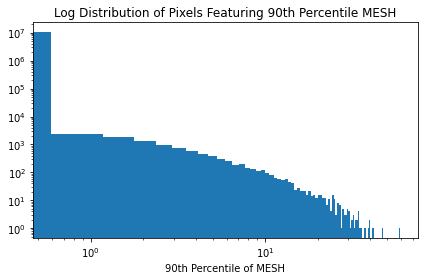

In [ ]:
#Plotting histogram of mesh_90 data
N_points = mesh_90
n_bins = 101

# Generate a normal distribution, center at x=0 and y=5
x = N_points
y = .8 * x + N_points + 25

fig, ax = plt.subplots(1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
ax.semilogx()
ax.semilogy()
plt.xlabel("90th Percentile of MESH")
plt.title("Log Distribution of Pixels Featuring 90th Percentile MESH")
ax.hist(x, bins=n_bins)



(array([1.0480155e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.5774000e+04, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

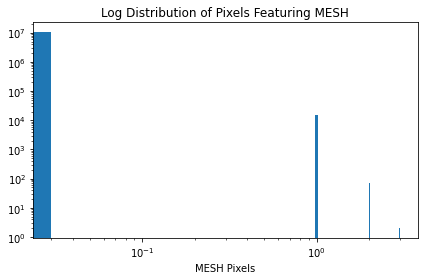

In [ ]:
N_points = mesh
n_bins = 101

# Generate a normal distribution
x = N_points
y = .8 * x + N_points + 25

fig, ax = plt.subplots(1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
ax.semilogx()
ax.semilogy()
plt.xlabel("MESH Pixels")
plt.title("Log Distribution of Pixels Featuring MESH")
ax.hist(x, bins=n_bins)


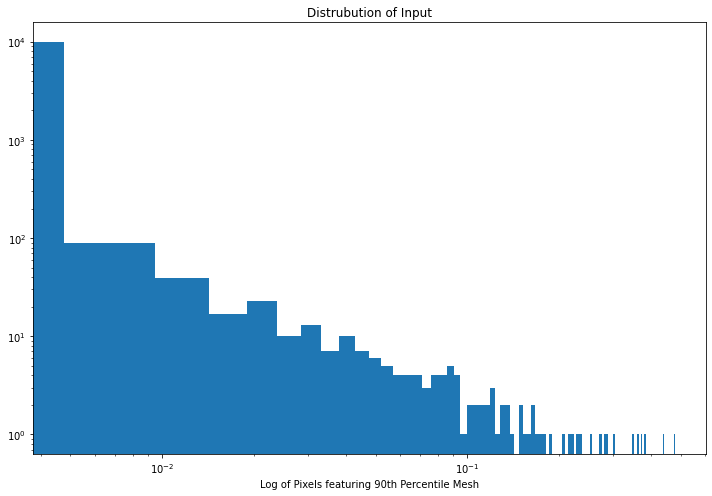

<Figure size 432x288 with 0 Axes>

In [ ]:
n_bins = 101
  
# Creating distribution
x = meshfrac
y = .8 ** meshfrac + 25
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize=(10, 7), 
                        sharex=True,
                        sharey=True,
                        tight_layout=True)
  
axs.hist(x, bins=n_bins)
  
# Show plot
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Log of Pixels featuring 90th Percentile Mesh")
plt.title("Distrubution of Input")
plt.show()

plt.savefig('./gdrive/MyDrive/Input_images/meshFrac_log.png',dpi=300)

In [ ]:
input_array.shape

(17, 8250, 32, 32)

In [ ]:
#Get the mean value of meshfrac
meshfrac.mean()
mean_mesh = meshfrac.mean()
print(mean_mesh)

#Finding the log of the mean value
math.log(mean_mesh)


0.0015096227134146342


-6.495895518040986

In [ ]:
#Get the standard deviation
meshfrac.std()

0.01627728796924291

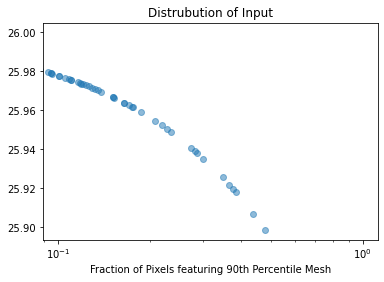

In [ ]:

x = meshfrac
y = .8 ** meshfrac + 25
  

  
# Show plot
plt.scatter(x, y, alpha=0.5)
plt.xscale("log")
plt.xlabel("Fraction of Pixels featuring 90th Percentile Mesh")
plt.title("Distrubution of Input")
plt.show()


In [8]:
#function to plot the HRRR input variable fields
def plot_patch(patches, idx = 0):
    r = idx
    keys = list(patches.variables.keys())
    keys.sort()
    fig,axes = plt.subplots(4,5,figsize=(20,15))
    axes = axes.ravel()
    for i,ax in enumerate(axes[:-1]):
        pm = ax.imshow(patches[keys[i]].values[r,:,:],cmap='cividis')
        ax.set_title(keys[i])
        plt.colorbar(pm,ax=ax,shrink=0.75)
    axes[-1].axis(False)
    plt.tight_layout()
    plt.show()

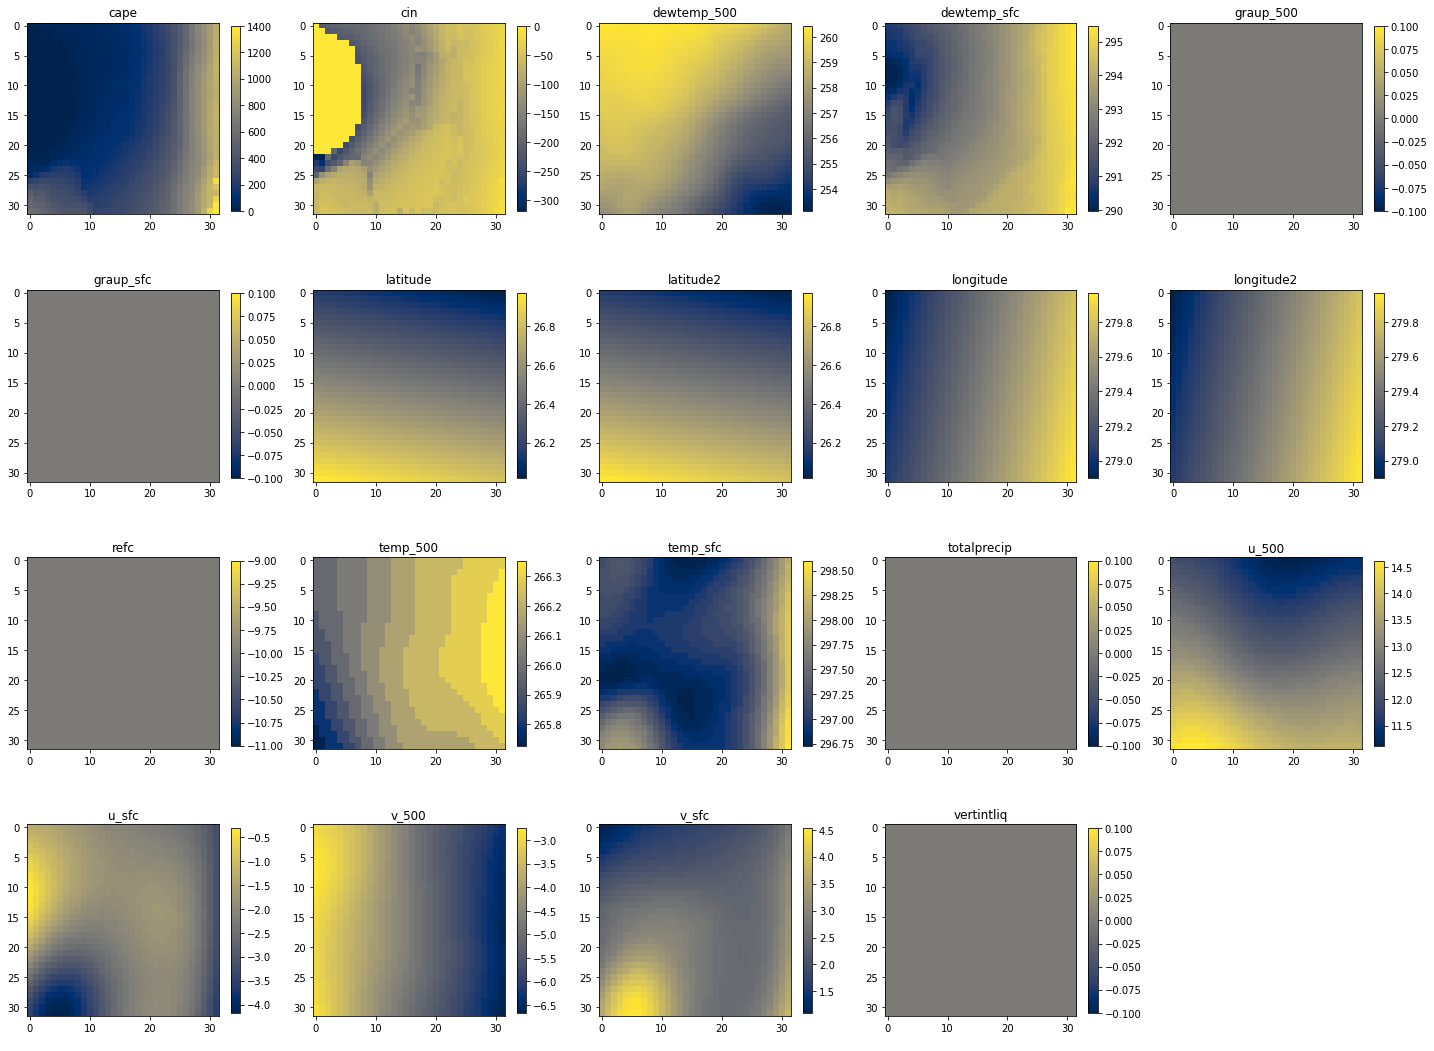

In [19]:
plot_patch(input_ds)

In [21]:
#function to plot the truth data
def plot_mesh_truth(mesh, idx = 0):
  keys = ["90th Percentile MRMS"]
  fig, axes = plt.subplots(1,2,figsize=(20,5))
  axes = axes.ravel()
  for i,ax in enumerate(axes[:-1]):
    pm = ax.imshow(mesh[idx,:,:,i],cmap = 'cividis',vmin = 0,vmax = 1)
    ax.set_title(keys[i])
    plt.colorbar(pm, ax=ax,shrink=0.60)
  axes[-1].axis(False)
  plt.tight_layout()
  plt.show()


IndexError: ignored

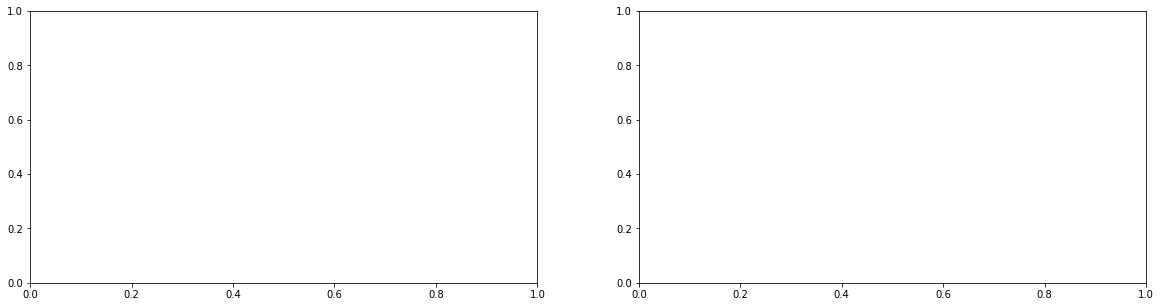

In [35]:
plot_mesh_truth(mesh90)